In [345]:
# INIT
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier 

# LOADING DATA 
df = pd.read_csv(r"X:\LambdaSchool\hurricanes-edited.csv")
!pip install category_encoders==2.*
!pip install pandas-profiling==2.*
df3 = df

# CHANGING COLUMN NAMES
"""for r in range(0, 163):
    if df3.iloc[0, r] != " ":
        df3.iloc[0, r] = df3.columns[r] + "_" + df3.iloc[0, r]
    else: 
        df3.iloc[0, r] = df3.columns[r]

df3.columns = df3.iloc[0, :]
df3.drop(df3.index[0], inplace=True)"""

df3.drop("Unnamed: 0", axis=1, inplace=True)

a = []
iter = ['kts', 'degrees_north', 'degrees_east', 'nmile', 'mb', 'GUST', 'ft', 'km']
for i in iter:
    a = a + (list(df3.columns[df3.columns.str.contains(i) == True ]))
print(a)
for k in a:
    df3[a] = df3[a].apply(pd.to_numeric, errors='coerce')

c:\users\lumie\.virtualenvs\ds-unit-2-applied-modeling-v6_d-3ek\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (20,21,26,162,163) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


['WMO_WIND_kts', 'USA_WIND_kts', 'TOKYO_WIND_kts', 'CMA_WIND_kts', 'HKO_WIND_kts', 'NEWDELHI_WIND_kts', 'REUNION_WIND_kts', 'BOM_WIND_kts', 'NADI_WIND_kts', 'WELLINGTON_WIND_kts', 'DS824_WIND_kts', 'TD9636_WIND_kts', 'TD9635_WIND_kts', 'NEUMANN_WIND_kts', 'MLC_WIND_kts', 'USA_GUST_kts', 'BOM_GUST_kts', 'REUNION_GUST_kts', 'STORM_SPEED_kts', 'LAT_degrees_north', 'USA_LAT_degrees_north', 'TOKYO_LAT_degrees_north', 'CMA_LAT_degrees_north', 'HKO_LAT_degrees_north', 'NEWDELHI_LAT_degrees_north', 'REUNION_LAT_degrees_north', 'BOM_LAT_degrees_north', 'NADI_LAT_degrees_north', 'WELLINGTON_LAT_degrees_north', 'DS824_LAT_degrees_north', 'TD9636_LAT_degrees_north', 'TD9635_LAT_degrees_north', 'NEUMANN_LAT_degrees_north', 'MLC_LAT_degrees_north', 'LON_degrees_east', 'USA_LON_degrees_east', 'TOKYO_LON_degrees_east', 'CMA_LON_degrees_east', 'HKO_LON_degrees_east', 'NEWDELHI_LON_degrees_east', 'REUNION_LON_degrees_east', 'BOM_LON_degrees_east', 'NADI_LON_degrees_east', 'WELLINGTON_LON_degrees_east', 

In [237]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df3, minimal=True)

profile

In [240]:
df3[df3['SEASON_Year'] == 2020].head(20)

SID  SEASON_Year  NUMBER BASIN SUBBASIN  NAME  \
689668  2019328S10168         2020      55    SP       MM  RITA   
689669  2019328S10168         2020      55    SP       MM  RITA   
689670  2019328S10168         2020      55    SP       MM  RITA   
689671  2019328S10168         2020      55    SP       MM  RITA   
689672  2019328S10168         2020      55    SP       MM  RITA   
689673  2019328S10168         2020      55    SP       MM  RITA   
689674  2019328S10168         2020      55    SP       MM  RITA   
689675  2019328S10168         2020      55    SP       MM  RITA   
689676  2019328S10168         2020      55    SP       MM  RITA   
689677  2019328S10168         2020      55    SP       MM  RITA   
689678  2019328S10168         2020      55    SP       MM  RITA   
689679  2019328S10168         2020      55    SP       MM  RITA   
689680  2019328S10168         2020      55    SP       MM  RITA   
689681  2019328S10168         2020      55    SP       MM  RITA   
689682  2019328S10168         2020      55    SP       MM  RITA   
689683  2019328S10168         2020      55    SP       MM  RITA   
689684  2019328S10168         2020      55    SP       MM  RITA   
689685  2019328S10168         2020      55    SP       MM  RITA   
689686  2019328S10168         2020      55    SP       MM  RITA   
689687  2019328S10168         2020      55    SP       MM  RITA   

                   ISO_TIME NATURE  LAT_degrees_north  LON_degrees_east  \
689668  2019-11-24 00:00:00     NR           -10.2000           168.200   
689669  2019-11-24 03:00:00     NR           -10.1652           168.673   
689670  2019-11-24 06:00:00     NR           -10.2000           169.000   
689671  2019-11-24 09:00:00     NR           -10.3549           169.095   
689672  2019-11-24 12:00:00     NR           -10.6000           169.100   
689673  2019-11-24 15:00:00     NR           -10.8850           169.178   
689674  2019-11-24 18:00:00     NR           -11.2000           169.300   
689675  2019-11-24 21:00:00     NR           -11.5075           169.470   
689676  2019-11-25 00:00:00     NR           -11.8000           169.700   
689677  2019-11-25 03:00:00     NR           -12.0651           170.000   
689678  2019-11-25 06:00:00     NR           -12.3000           170.300   
689679  2019-11-25 09:00:00     NR           -12.5150           170.575   
689680  2019-11-25 12:00:00     NR           -12.7000           170.700   
689681  2019-11-25 15:00:00     NR           -12.7675           170.567   
689682  2019-11-25 18:00:00     NR           -13.0000           170.300   
689683  2019-11-25 21:00:00     NR           -13.8026           170.036   
689684  2019-11-26 00:00:00     NR           -14.5000           169.800   
689685  2019-11-26 03:00:00     NR           -14.3900           169.662   
689686  2019-11-26 06:00:00     NR           -14.1000           169.600   
689687  2019-11-26 09:00:00     NR           -14.1899           169.637   

        WMO_WIND_kts  WMO_PRES_mb WMO_AGENCY   TRACK_TYPE  DIST2LAND_km  \
689668           NaN          NaN             PROVISIONAL           533   
689669           NaN          NaN             PROVISIONAL           553   
689670           NaN          NaN             PROVISIONAL           567   
689671           NaN          NaN             PROVISIONAL           552   
689672           NaN          NaN             PROVISIONAL           533   
689673           NaN          NaN             PROVISIONAL           510   
689674           NaN          NaN             PROVISIONAL           487   
689675           NaN          NaN             PROVISIONAL           470   
689676           NaN          NaN             PROVISIONAL           455   
689677           NaN          NaN             PROVISIONAL           451   
689678           NaN          NaN             PROVISIONAL           459   
689679           NaN          NaN             PROVISIONAL           470   
689680           NaN          NaN             PROVISIONAL  

In [346]:
df3.drop(['REUNION_GUST_kts', 'TD9636_PRES_mb', 'REUNION_R64_NW_nmile', 'REUNION_R64_SW_nmile', 'REUNION_R64_SE_nmile', 'REUNION_R64_NE_nmile'], axis=1, inplace = True)

In [347]:
df3.drop(['BOM_GUST_kts', 'BOM_GUST_PER_second', 'USA_SEAHGT_ft', 'USA_SEARAD_NE_nmile', 'USA_SEARAD_SE_nmile', 'USA_SEARAD_SW_nmile', 'USA_SEARAD_NW_nmile'], axis=1, inplace = True)

In [348]:
df3.drop(['NEUMANN_PRES_mb', 'MLC_LAT_degrees_north', 'MLC_LON_degrees_east', 'MLC_CLASS', 'MLC_WIND_kts', 'MLC_PRES_mb', 'USA_GUST_kts'], axis=1, inplace = True)

In [349]:
df3.drop(['WMO_WIND_kts', 'WMO_PRES_mb', 'USA_R50_NE_nmile', 'USA_R50_SE_nmile', 'USA_R50_SW_nmile', 'USA_R50_NW_nmile', 'USA_R64_NE_nmile', 'USA_R64_SE_nmile', 'USA_R64_SW_nmile', 'USA_R64_NW_nmile', 'USA_EYE_nmile', 'TOKYO_LAT_degrees_north', 'TOKYO_LON_degrees_east', 'TOKYO_WIND_kts', 'TOKYO_PRES_mb', 'TOKYO_R50_LONG_nmile', 'TOKYO_R50_SHORT_nmile', 'TOKYO_R30_LONG_nmile', 'TOKYO_R30_SHORT_nmile', 'CMA_LAT_degrees_north', 'CMA_LON_degrees_east', 'CMA_WIND_kts', 'CMA_PRES_mb', 'HKO_LAT_degrees_north', 'HKO_LON_degrees_east', 'HKO_WIND_kts', 'HKO_PRES_mb', 'NEWDELHI_LAT_degrees_north', 'NEWDELHI_LON_degrees_east', 'NEWDELHI_WIND_kts', 'NEWDELHI_PRES_mb', 'NEWDELHI_DP_mb', 'NEWDELHI_POCI_mb', 'REUNION_LAT_degrees_north', 'REUNION_LON_degrees_east', 'REUNION_WIND_kts', 'REUNION_PRES_mb', 'REUNION_RMW_nmile', 'REUNION_R34_NE_nmile', 'REUNION_R34_SE_nmile', 'REUNION_R34_SW_nmile', 'REUNION_R34_NW_nmile', 'REUNION_R50_NE_nmile', 'REUNION_R50_SE_nmile', 'REUNION_R50_SW_nmile', 'REUNION_R50_NW_nmile', 'BOM_LAT_degrees_north', 'BOM_LON_degrees_east', 'BOM_WIND_kts', 'BOM_PRES_mb', 'BOM_RMW_nmile', 'BOM_R34_NE_nmile', 'BOM_R34_SE_nmile', 'BOM_R34_SW_nmile', 'BOM_R34_NW_nmile', 'BOM_R50_NE_nmile', 'BOM_R50_SE_nmile', 'BOM_R50_SW_nmile', 'BOM_R50_NW_nmile', 'BOM_R64_NE_nmile', 'BOM_R64_SE_nmile', 'BOM_R64_SW_nmile', 'BOM_R64_NW_nmile', 'BOM_ROCI_nmile', 'BOM_POCI_mb', 'BOM_EYE_nmile', 'NADI_LAT_degrees_north', 'NADI_LON_degrees_east', 'NADI_CAT_1', 'NADI_WIND_kts', 'NADI_PRES_mb', 'WELLINGTON_LAT_degrees_north', 'WELLINGTON_LON_degrees_east', 'WELLINGTON_WIND_kts', 'WELLINGTON_PRES_mb', 'DS824_LAT_degrees_north', 'DS824_LON_degrees_east', 'DS824_WIND_kts', 'DS824_PRES_mb', 'TD9636_LAT_degrees_north', 'TD9636_LON_degrees_east', 'TD9636_STAGE', 'TD9636_WIND_kts', 'TD9635_LAT_degrees_north', 'TD9635_LON_degrees_east', 'TD9635_WIND_kts', 'TD9635_PRES_mb', 'TD9635_ROCI_nmile', 'NEUMANN_LAT_degrees_north', 'NEUMANN_LON_degrees_east', 'NEUMANN_WIND_kts', 'REUNION_GUST_PER_second'], axis=1, inplace=True)

In [350]:
df3.drop(['USA_R34_NE_nmile', 'USA_R34_SE_nmile', 'USA_R34_SW_nmile',
'USA_R34_NW_nmile'], axis = 1, inplace = True)


In [351]:
df3.drop(['WMO_AGENCY',
 'USA_AGENCY',
 'USA_RECORD',
 'USA_STATUS',
 'TOKYO_GRADE_1',
 'TOKYO_R50_DIR',
 'TOKYO_R30_DIR',
 'TOKYO_LAND_1',
 'CMA_CAT_1',
 'HKO_CAT',
 'NEWDELHI_GRADE',
 'NEWDELHI_CI_1',
 'REUNION_TYPE',
 'REUNION_TNUM_1',
 'REUNION_CI_1',
 'BOM_TYPE',
 'BOM_TNUM_1',
 'BOM_CI_1',
 'BOM_POS_METHOD',
 'BOM_PRES_METHOD',
 'DS824_STAGE',
 'NEUMANN_CLASS'], axis=1, inplace=True)

In [247]:
pd.set_option('display.max_columns', 500)
df3[df3['SEASON_Year'] == 2020]


SID  SEASON_Year  NUMBER BASIN SUBBASIN       NAME  \
689668  2019328S10168         2020      55    SP       MM       RITA   
689669  2019328S10168         2020      55    SP       MM       RITA   
689670  2019328S10168         2020      55    SP       MM       RITA   
689671  2019328S10168         2020      55    SP       MM       RITA   
689672  2019328S10168         2020      55    SP       MM       RITA   
...               ...          ...     ...   ...      ...        ...   
691890  2020227N12245         2020      54    EP       MM  NOT_NAMED   
691891  2020227N12245         2020      54    EP       MM  NOT_NAMED   
691892  2020227N12245         2020      54    EP       MM  NOT_NAMED   
691893  2020227N12245         2020      54    EP       MM  NOT_NAMED   
691894  2020227N12245         2020      54    EP       MM  NOT_NAMED   

                   ISO_TIME NATURE  LAT_degrees_north  LON_degrees_east  \
689668  2019-11-24 00:00:00     NR           -10.2000           168.200   
689669  2019-11-24 03:00:00     NR           -10.1652           168.673   
689670  2019-11-24 06:00:00     NR           -10.2000           169.000   
689671  2019-11-24 09:00:00     NR           -10.3549           169.095   
689672  2019-11-24 12:00:00     NR           -10.6000           169.100   
...                     ...    ...                ...               ...   
691890  2020-08-15 12:00:00     DS            16.2000          -118.100   
691891  2020-08-15 15:00:00     DS            16.6425          -118.337   
691892  2020-08-15 18:00:00     DS            17.1000          -118.500   
691893  2020-08-15 21:00:00     DS            17.5900          -118.538   
691894  2020-08-16 00:00:00     TS            18.1000          -118.500   

         TRACK_TYPE  DIST2LAND_km  LANDFALL_km           IFLAG USA_ATCF_ID  \
689668  PROVISIONAL           533        533.0  O_____________    SP012019   
689669  PROVISIONAL           553        553.0  P_____________    SP012019   
689670  PROVISIONAL           567        562.0  O_____________    SP012019   
689671  PROVISIONAL           552        533.0  P_____________    SP012019   
689672  PROVISIONAL           533        510.0  O_____________    SP012019   
...             ...           ...          ...             ...         ...   
691890  PROVISIONAL          1131       1111.0  O_____________    EP112020   
691891  PROVISIONAL          1111       1078.0  P_____________    EP112020   
691892  PROVISIONAL          1078       1034.0  O_____________    EP112020   
691893  PROVISIONAL          1034        991.0  P_____________    EP112020   
691894  PROVISIONAL           991          NaN  O_____________    EP112020   

        USA_LAT_degrees_north  USA_LON_degrees_east  USA_WIND_kts  \
689668               -10.2000               168.200          35.0   
689669               -10.1652               168.673          37.0   
689670               -10.2000               169.000          39.0   
689671               -10.3549               169.095          45.0   
689672               -10.6000               169.100          51.0   
...                       ...                   ...           ...   
691890                16.2000              -118.100          25.0   
691891                16.6425              -118.337          25.0   
691892                17.1000              -118.500          25.0   
691893                17.5900              -118.538          27.0   
691894                18.1000              -118.500          30.0   

        USA_PRES_mb USA_SSHS_1  USA_POCI_mb  USA_ROCI_nmile  USA_RMW_nmile  \
689668        997.0          0       1004.0           170.0           50.0   
689669        994.0          0       1004.0           170.0           50.0   
689670        992.0          0       1004.0           170.0           50.0   
689671        991.0          0       1004.0           170.0           50.0   
689672        991.0          0       1004.0           170.0           50.0   
...             ..

In [248]:
df3.groupby('SID', axis=1, sort=False)
florence = df3[(df3['NAME'] == 'FLORENCE') & (df3['SEASON_Year'] == 2018)]

In [352]:
df3['ISO_TIME'] = pd.to_datetime(df3['ISO_TIME'], infer_datetime_format=True)

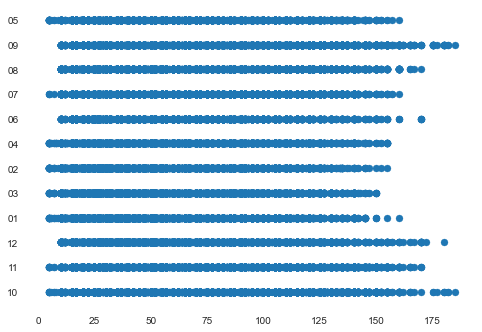

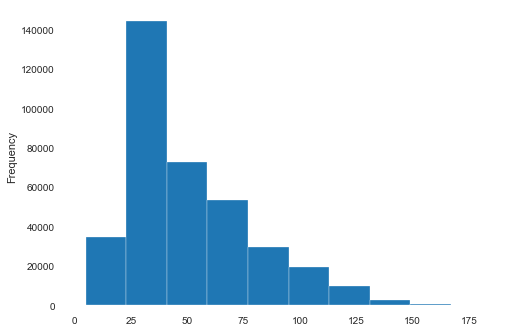

In [507]:
plt.scatter( df3['USA_WIND_kts'], df3['ISO_TIME'].dt.strftime('%m'));
plt.show();
df3['USA_WIND_kts'].plot(kind='hist');
plt.show();

In [ ]:
## Preparation before building a model

In [353]:
hurr = df3.drop(['NUMBER', 'NAME', 'TRACK_TYPE', 'IFLAG', 'USA_ATCF_ID', 'USA_SSHS_1'], axis=1)

In [354]:
hurr.drop(['USA_LAT_degrees_north', 'USA_POCI_mb', 'USA_ROCI_nmile', 'USA_RMW_nmile'], axis=1, inplace=True)

In [355]:
hurr.drop(['USA_LON_degrees_east', 'SUBBASIN', 'BASIN'], axis=1, inplace = True)

In [356]:
hurr.dropna( inplace=True)

In [358]:
hurr['STORM_DIR_degrees'] = pd.to_numeric(hurr1['STORM_DIR_degrees'])

In [360]:
###EXPERIMENTAL

Int64Index([  1541,   2316,   2938,   2948,   2949,   3808,   4365,   4602,
              5200,   6288,
            ...
            691884, 691885, 691886, 691887, 691888, 691889, 691890, 691891,
            691892, 691893],
           dtype='int64', length=131561)

In [413]:
hurr.drop(['DAY', 'STORM_SPEED_kts'], axis=1, inplace=True)

In [ ]:
hurr.drop('')

In [ ]:
###Baseline Prediction

In [361]:
hurr['STORM_SPEED_kts'].mean()

10.052918418072226

In [362]:
###FEATURE ENGINEERING
hurr['DAY'] = hurr['ISO_TIME'].dt.day
hurr['MONTH'] = hurr['ISO_TIME'].dt.month
hurr['YEAR'] = hurr['ISO_TIME'].dt.year

In [363]:
hurr.drop('ISO_TIME', axis=1, inplace=True)

In [ ]:
###Building a model

In [369]:
hurr.drop('SID', axis=1, inplace=True)

In [367]:
hurr.drop('SEASON_Year', axis=1, inplace=True)

In [397]:
hurr.drop('YEAR', axis=1, inplace=True)

In [512]:
train, test = train_test_split(hurr, test_size=0.1)
print('Original Size', hurr.shape)
print('Train Size', train.shape)

Original Size (131561, 9)
Train Size (118404, 9)


In [513]:
###DATA SPLITTING
test = hurr.sample(frac=0.1, random_state=42)

target = 'USA_WIND_kts'
y = train[target]
X = train.drop(target, axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)

In [514]:
###ENCODING CAT DATA
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.fit_transform(X_val)

In [515]:
###SCALING
scaler = StandardScaler()
XT_train = scaler.fit_transform(X_train_encoded)
XT_val = scaler.fit_transform(X_val_encoded)

In [499]:
###ENSEMBLE MODEL
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import RidgeCV, SGDRegressor, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


model = RandomForestRegressor(random_state=42)


param_grid1 = {'n_estimators': range(100, 200, 100)}
gs = GridSearchCV(model, param_grid1, cv=2)



gs.fit(XT_train, y_train)
print(gs.best_params_)

{'n_estimators': 100}


In [490]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [500]:
gs.score(XT_train, y_train)

0.997128879273228

In [504]:
gs.score(XT_val, y_val)

0.9757837686559924

In [516]:
###LINEAR MODEL
from sklearn.model_selection import GridSearchCV



model2 = Ridge(solver='sparse_cg')

###HYPERPARAMETER TUNING

param_grid = {'alpha': [0.1, 0.01, 0.0001, 0.4, 0.5], 'fit_intercept' : ['True', 'False']} 

model2_cv = GridSearchCV(model2, param_grid, cv = 5)



model2_cv.fit(XT_train, y_train)
print(model2_cv.best_params_)

print(model2_cv.score(XT_train, y_train))
print(model2_cv.score(XT_val, y_val))

{'alpha': 0.5, 'fit_intercept': 'True'}
0.9311244024169535
0.9323175324673985


In [471]:
###XGBRegressor
from xgboost import XGBRegressor

model_boost = XGBRegressor()

param_grid ={}

xgbgs = GridSearchCV(model_boost, param_grid, cv=2)

xgbgs.fit(XT_train, y_train)

NATURE  LAT_degrees_north  LON_degrees_east  DIST2LAND_km  LANDFALL_km  \
615871     TS              24.30           121.925            15          0.0   
645645     TS              28.70           -44.700          2125       2115.0   
673958     TS              11.00          -122.300          1864       1864.0   
608568     TS              17.15           117.675           245        245.0   
590780     ET              26.70           -52.000          1674       1594.0   

        USA_WIND_kts  USA_PRES_mb  STORM_DIR_degrees  MONTH  
615871         115.0        937.0                333     10  
645645          45.0       1000.0                 67     10  
673958         120.0        953.0                283      7  
608568          45.0        991.0                292      8  
590780          35.0       1007.0                250     10

In [409]:
###PERMUTATION IMPORTANCE

In [411]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='r2',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_encoded, y_val)

feature_names = X_val.columns.tolist()
importances_prem = pd.Series(permuter.feature_importances_, feature_names).sort_values()
importances_prem

LON_degrees_east    -0.006800
STORM_SPEED_kts     -0.000427
DAY                 -0.000134
LANDFALL_km          0.001036
DIST2LAND_km         0.003671
STORM_DIR_degrees    0.004583
MONTH                0.006160
NATURE               0.007961
LAT_degrees_north    0.023577
USA_PRES_mb          1.805925
dtype: float64

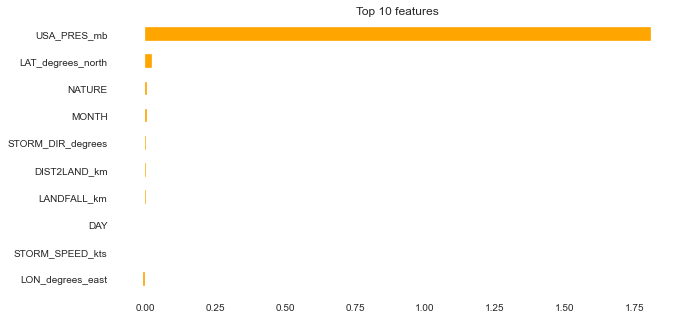

In [412]:
import matplotlib.pyplot as plt ###

n = 10
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances_prem.sort_values()[-n:].plot.barh(color='orange');

## Mapping

In [16]:
!pip install ipyleaflet
!jupyter nbextension install --py --symlink --sys-prefix ipyleaflet
!jupyter nbextension enable --py --sys-prefix ipyleaflet



Installing c:\users\lumie\.virtualenvs\ds-unit-2-applied-modeling-v6_d-3ek\lib\site-packages\ipyleaflet\static -> jupyter-leaflet
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable ipyleaflet --py --sys-prefix
    
Enabling notebook extension jupyter-leaflet/extension...
      - Validating: ok


In [18]:
!pip install widgetsnbextension
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension
import ipyleaflet
from ipyleaflet import Map, basemaps
from IPython.display import IFrame

center = [38.128, 2.588]
zoom = 5

basic_map = ipyleaflet.Map(basemap=basemaps.OpenTopoMap, center=center, zoom=zoom)

basic_map

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


Map(center=[38.128, 2.588], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

In [233]:
from ipyleaflet import Map, WMSLayer, basemaps, FullScreenControl, ScaleControl
from traitlets import Unicode


class TimeWMSLayer(WMSLayer):

    time = Unicode('').tag(sync=True, o=True)


time_wms = TimeWMSLayer(
    url='https://mesonet.agron.iastate.edu/cgi-bin/wms/nexrad/n0r-t.cgi?',
    layers='nexrad-n0r-wmst',
    time='2018-09-14T13:00:00Z',
    format='image/png',
    transparent=True,
    attribution='Weather data © 2012 IEM Nexrad'
)

m2 = Map(basemap=basemaps.CartoDB.DarkMatter, center=(30.661, -88.645), zoom=5)

m2.add_layer(time_wms)
m2.add_control(FullScreenControl())
m2.add_control(ScaleControl(position='bottomleft'))

m2

Map(center=[30.661, -88.645], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…